# Data and Setup

In [30]:
import os, cv2, requests, base64, imageio
from PIL import Image
from io import BytesIO
import seaborn as sn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

us_cities = pd.read_csv("us_cities_v2.csv")

capitals = us_cities.loc[us_cities['capital']]
capitals = capitals.reset_index(drop=True)

us_cities.head(20)

,city,state_id,state,county,lat,long,population,density,source,military,incorporated,capital,timezone,ranking,zips
0,New York,NY,New York,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,False,America/New_York,1,309
1,Los Angeles,CA,California,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,False,America/Los_Angeles,1,196
2,Chicago,IL,Illinois,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,False,America/Chicago,1,85
3,Miami,FL,Florida,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,False,America/New_York,1,30
4,Dallas,TX,Texas,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,False,America/Chicago,1,107
5,Philadelphia,PA,Pennsylvania,Philadelphia,40.0077,-75.1339,5649300,4554,polygon,False,True,False,America/New_York,1,86
6,Houston,TX,Texas,Harris,29.7863,-95.3889,5464251,1399,polygon,False,True,False,America/Chicago,1,181
7,Atlanta,GA,Georgia,Fulton,33.7627,-84.4224,5449398,1441,polygon,False,True,True,America/New_York,1,56
8,Washington,DC,District of Columbia,District of Columbia,38.9047,-77.0163,5379184,4457,polygon,False,True,True,America/New_York,1,292
9,Boston,MA,Massachusetts,Suffolk,42.3188,-71.0846,4688346,5532,polygon,False,True,True,America/New_York,1,53


# Exploratory Analysis

Correlation Matrix:
                    lat      long  population   density  military  \
lat           1.000000 -0.215509   -0.016610 -0.110029 -0.009574   
long         -0.215509  1.000000    0.000137  0.097224 -0.034446   
population   -0.016610  0.000137    1.000000  0.187886 -0.004027   
density      -0.110029  0.097224    0.187886  1.000000 -0.008361   
military     -0.009574 -0.034446   -0.004027 -0.008361  1.000000   
incorporated  0.092107  0.049000    0.044498  0.055060  0.045239   
capital       0.005615 -0.002157    0.202719  0.044607 -0.003399   
ranking       0.108526 -0.013105   -0.339929 -0.633650  0.005587   
zips         -0.030399  0.005758    0.841425  0.172890  0.002370   

              incorporated   capital   ranking      zips  
lat               0.092107  0.005615  0.108526 -0.030399  
long              0.049000 -0.002157 -0.013105  0.005758  
population        0.044498  0.202719 -0.339929  0.841425  
density           0.055060  0.044607 -0.633650  0.172890  
mil

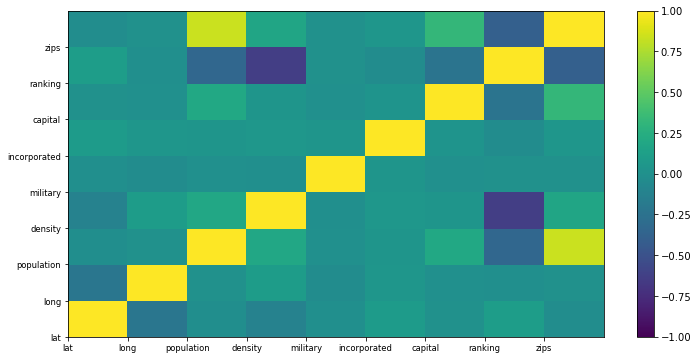

In [47]:
query = ['population', 'lat', 'long', 'density', 'zips']

#Correlation Matrix
corr = us_cities.corr()
print('Correlation Matrix:\n', corr)

fig1 = plt.figure(figsize=(12, 6))
heatmap = plt.pcolor(corr, vmin=-1, vmax=1)
plt.colorbar(heatmap)
labels = list(corr.index)
ticks = list(range(len(labels)))

_ = plt.xticks(ticks=ticks, labels=labels, size='small', stretch=150)
_ = plt.yticks(ticks=ticks, labels=labels, size='small')

Text(0, 0.5, 'Longitude')

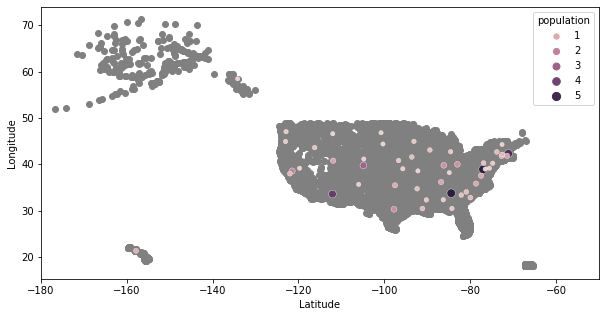

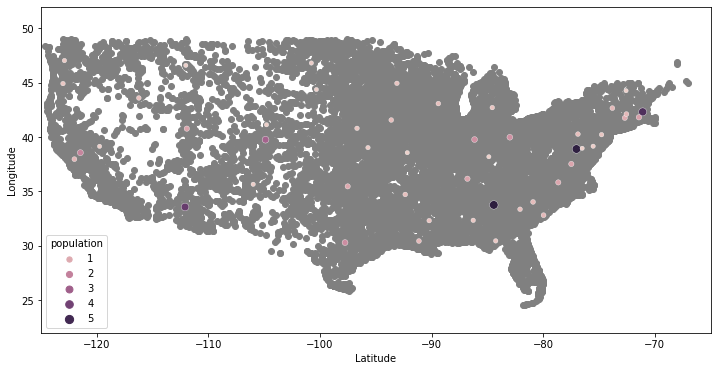

In [64]:
fig2 = plt.figure(figsize=(10, 5))

plt.scatter(us_cities['long'], us_cities['lat'], color='#808080')
sn.scatterplot(data=capitals, x='long', y='lat', hue='population', size='population')

plt.xlim(-180, -50)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

fig3 = plt.figure(figsize=(12, 6))
plt.scatter(us_cities['long'], us_cities['lat'], color='#808080')
sn.scatterplot(data=capitals, x='long', y='lat', hue='population', size='population')

plt.xlim(-125, -65)
plt.ylim(22, 52)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [77]:
#TODO - Process the RGB hists and intensities with a function, going through 

img_list = os.listdir('images/')[1:]
for img_name in img_list:
    img = Image.open('images/'+img_name)
    
img_list

['_Albany_2017_03_01.png',
 '_Albany_2020_05_01.png',
 '_Annapolis_2017_08_01.png',
 '_Annapolis_2019_06_01.png',
 '_Atlanta_2016_05_01.png',
 '_Atlanta_2017_03_01.png',
 '_Augusta_2016_05_01.png',
 '_Augusta_2017_07_01.png',
 '_Austin_2016_05_01.png',
 '_Austin_2019_05_01.png',
 '_Baton_Rouge_2016_05_01.png',
 '_Baton_Rouge_2020_05_01.png',
 '_Bismarck_2016_10_01.png',
 '_Bismarck_2019_06_01.png',
 '_Boise_2016_05_01.png',
 '_Boise_2019_05_01.png',
 '_Boston_2016_05_01.png',
 '_Boston_2020_04_01.png',
 '_Carson_City_2019_05_01.png',
 '_Carson_City_2020_05_01.png',
 '_Charleston_2017_04_01.png',
 '_Charleston_2020_03_01.png',
 '_Cheyenne_2016_06_01.png',
 '_Cheyenne_2020_05_01.png',
 '_Columbia_2016_05_01.png',
 '_Columbia_2017_04_01.png',
 '_Columbus_2016_05_01.png',
 '_Columbus_2017_03_01.png',
 '_Concord_2017_05_01.png',
 '_Concord_2020_05_01.png',
 '_Denver_2016_05_01.png',
 '_Denver_2019_10_01.png',
 '_Des_Moines_2017_05_01.png',
 '_Des_Moines_2020_03_01.png',
 '_Dover_2017_03_01.